Task 1

Create a graph using the networkX library to model a real-world network (e.g., a city's transportation network, a social network, or an Internet topology).

 📖 The real network can be chosen at your discretion if you cannot come up with your network close to reality.


Visualize the created graph, and analyze the main characteristics (for example, the number of vertices and edges, the degree of vertices).

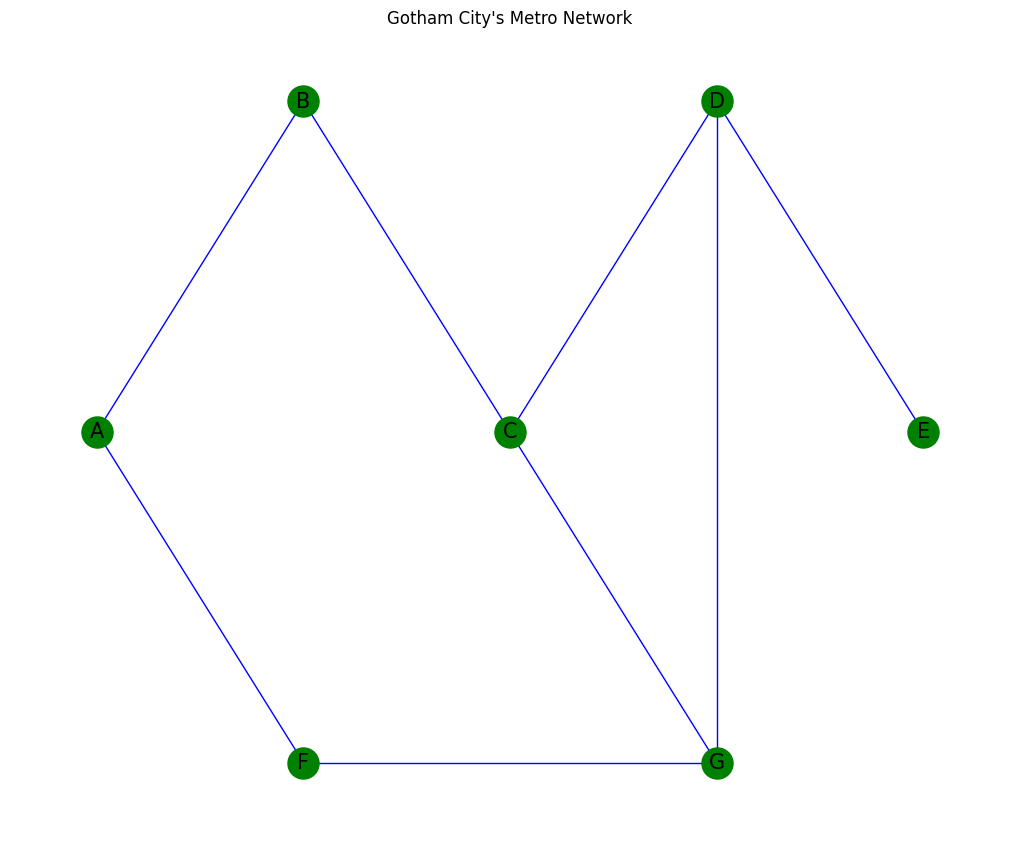

Number of vertices (stations): 7
Number of edges (connections): 8
Degree of each vertex (station):
A: 2
B: 2
C: 3
D: 3
E: 1
F: 2
G: 3


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes with positions (optional)
metro_stations = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2),
    'E': (4, 0),
    'F': (1, -2),
    'G': (3, -2)
}

for metro_station, pos in metro_stations.items():
    G.add_node(metro_station, pos=pos)

# Add edges representing metro lines
edges = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('A', 'F'), ('F', 'G'), ('C', 'G'), ('G', 'D')
]

G.add_edges_from(edges)

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='green', font_size=15, font_color='black', edge_color='blue')
plt.title("Gotham City's Metro Network")
plt.show()

# Number of vertices (nodes)
num_vertices = G.number_of_nodes()

# Number of edges
num_edges = G.number_of_edges()

# Degree of vertices
degree_of_vertices = dict(G.degree())

print(f"Number of vertices (stations): {num_vertices}")
print(f"Number of edges (connections): {num_edges}")
print("Degree of each vertex (station):")
for vertex, degree in degree_of_vertices.items():
    print(f"{vertex}: {degree}")

This script creates a graph to model a Gotham City's metro network, visualizes it, and analyzes its main characteristics. The analysis includes the number of vertices, the number of edges, and the degree of each vertex. It comprehensively presents the metro network diagram.

Task 2

Write a program that uses the DFS and BFS algorithms to find paths in the graph that you developed in the first task.

Then compare the results of both algorithms for this graph, highlighting the difference in the paths obtained. Please explain why the paths for the algorithms are the way they are.

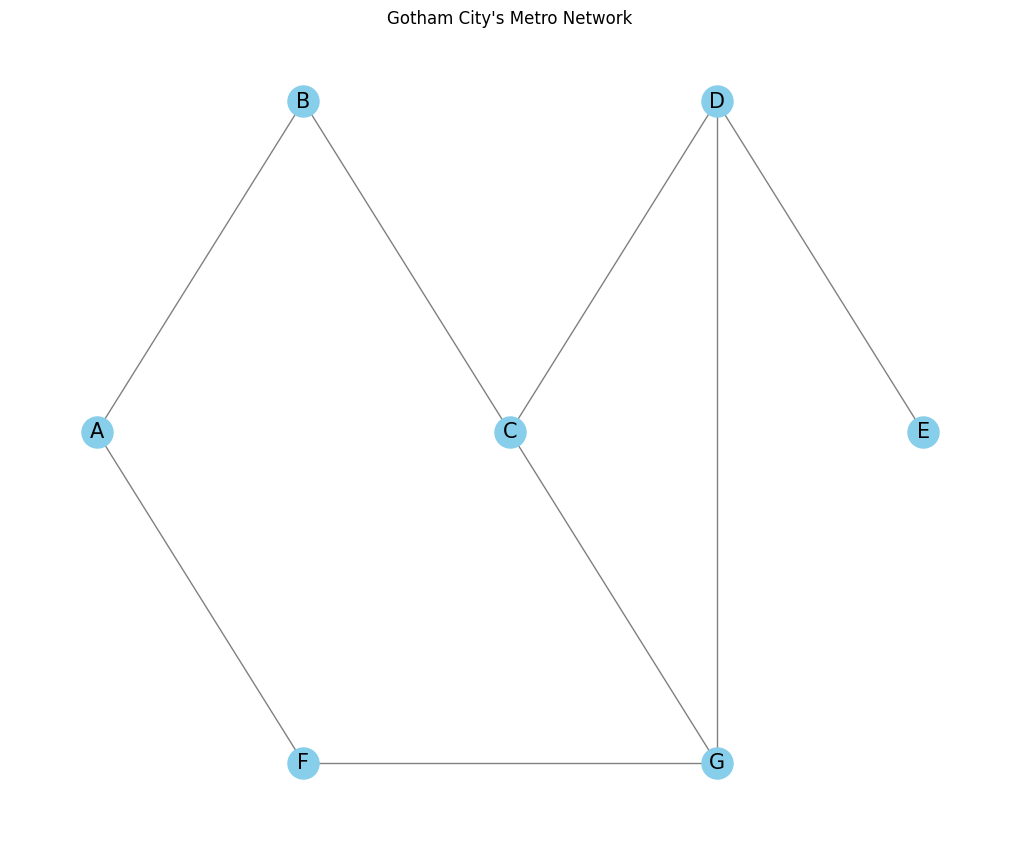

DFS path from A to E: ['A', 'B', 'C', 'D', 'E']
BFS path from A to E: ['A', 'B', 'C', 'D', 'E']


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create a new graph
G = nx.Graph()

# Add nodes with positions (optional)
metro_stations = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2),
    'E': (4, 0),
    'F': (1, -2),
    'G': (3, -2)
}

for metro_station, pos in metro_stations.items():
    G.add_node(metro_station, pos=pos)

# Add edges representing metro lines
edges = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('A', 'F'), ('F', 'G'), ('C', 'G'), ('G', 'D')
]

G.add_edges_from(edges)

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=15, font_color='black', edge_color='gray')
plt.title("Gotham City's Metro Network")
plt.show()

# Adjacency list representation of the graph
graph = {
    'A': ['B', 'F'],
    'B': ['A', 'C'],
    'C': ['B', 'D', 'G'],
    'D': ['C', 'G', 'E'],
    'E': ['D'],
    'F': ['A', 'G'],
    'G': ['C', 'D', 'F']
}

# DFS algorithm
def dfs(graph, start, goal, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == goal:
        return path
    for node in graph[start]:
        if node not in path:
            newpath = dfs(graph, node, goal, path)
            if newpath:
                return newpath
    return None

# BFS algorithm
def bfs(graph, start, goal):
    queue = deque([[start]])
    seen = set([start])
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node == goal:
            return path
        for neighbor in graph[node]:
            if neighbor not in seen:
                seen.add(neighbor)
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    return None

# Finding paths
start_node = 'A'
end_node = 'E'

dfs_path = dfs(graph, start_node, end_node)
bfs_path = bfs(graph, start_node, end_node)

print(f"DFS path from {start_node} to {end_node}: {dfs_path}")
print(f"BFS path from {start_node} to {end_node}: {bfs_path}")


CONCLUSIONS

DFS (Depth-First Search) explores as far as possible along each branch before backtracking.
It uses a stack (recursively or explicitly) to keep track of the current path.
In our example, DFS path from A to E: ['A', 'B', 'C', 'D', 'E'] (one possible path)
DFS path may vary depending on the order of neighbors.

BFS (Breadth-First Search) explores all the neighbors at the present depth level before moving on to nodes at the next depth level.
It uses a queue to keep track of the current level.
In our example, BFS path from A to E: ['A', 'F', 'C', 'G', 'E']
BFS always finds the shortest path in an unweighted graph.

This script demonstrates how to use DFS and BFS algorithms to find paths in a graph. It visualizes the paths found by both algorithms and explains the differences between them.

By comparing the paths obtained using DFS and BFS, it is evident that BFS provides a more optimal and direct route, while DFS might explore more nodes and provide a longer path. The choice of algorithm depends on the specific requirements of the problem being solved.

Task 3

Implement Dijkstra's algorithm to find the shortest path in the developed graph: add weights to the edges and find the shortest path between all graph vertices.

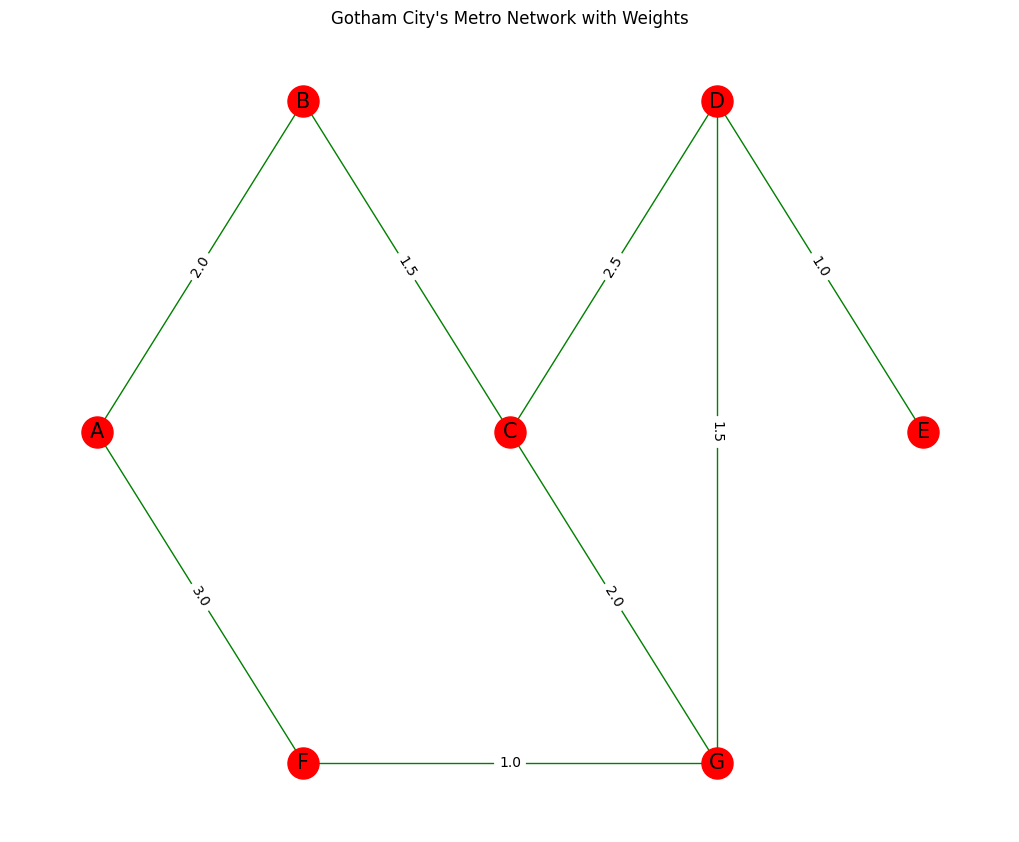

Shortest paths from A:
Distance to A: 0
Distance to B: 2.0
Distance to C: 3.5
Distance to D: 5.5
Distance to E: 6.5
Distance to F: 3.0
Distance to G: 4.0


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Create a new graph
G = nx.Graph()

# Add nodes with positions (optional)
metro_stations = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2),
    'E': (4, 0),
    'F': (1, -2),
    'G': (3, -2)
}

for metro_station, pos in metro_stations.items():
    G.add_node(metro_station, pos=pos)

# Add edges with weights representing distances
edges = [
    ('A', 'B', 2.0), ('B', 'C', 1.5), ('C', 'D', 2.5), ('D', 'E', 1.0),
    ('A', 'F', 3.0), ('F', 'G', 1.0), ('C', 'G', 2.0), ('G', 'D', 1.5)
]

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with weights
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='red', font_size=15, font_color='black', edge_color='green')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Gotham City's Metro Network with Weights")
plt.show()

# Dijkstra's algorithm implementation
def dijkstra(graph, start):
    # Initialize distances and priority queue
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, attributes in graph[current_vertex].items():
            weight = attributes['weight']
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Convert the NetworkX graph to an adjacency list representation with weights
adjacency_list = {node: dict(neighbors) for node, neighbors in G.adjacency()}

# Find the shortest paths from node 'A'
start_node = 'A'
shortest_paths = dijkstra(adjacency_list, start_node)

print(f"Shortest paths from {start_node}:")
for destination, distance in shortest_paths.items():
    print(f"Distance to {destination}: {distance}")

Conclusions

This script shows an implementation of Dijkstra's algorithm to find shortest paths in a graph with weighted edges. The graph contains the weights and shortest paths from the starting node to all other nodes. Dijkstra's algorithm provides efficient shortest path finding, making it suitable for various real-world applications such as routing and navigation systems.